In [4]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Downloads/Customers.csv')
products = pd.read_csv('Downloads/Products.csv')
transactions = pd.read_csv('Downloads/Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

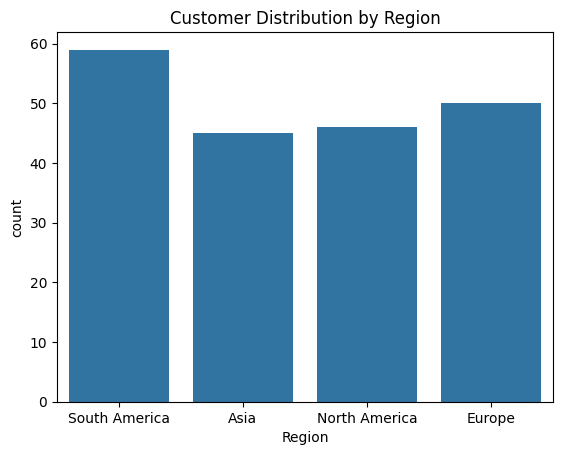

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

C:\Users\nirma\AppData\Local\Temp\ipykernel_19420\3985466397.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  customers.resample('M').size().plot()


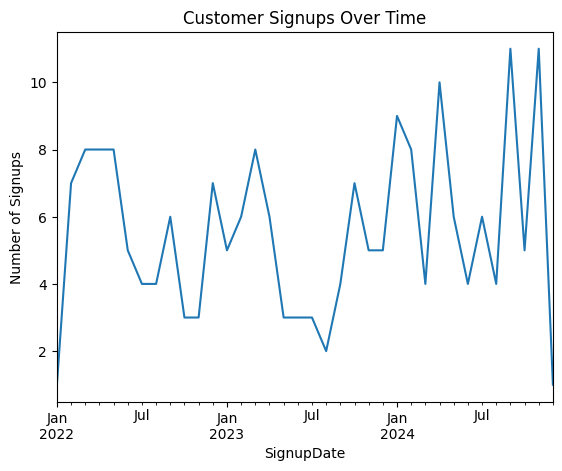

In [8]:
customers.set_index('SignupDate', inplace=True)
customers.resample('M').size().plot()
plt.title('Customer Signups Over Time')
plt.ylabel('Number of Signups')
plt.show()

In [9]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_product_ids = top_products.index
top_products_info = products[products['ProductID'].isin(top_product_ids)]
print(top_products_info)

   ProductID               ProductName     Category   Price
18      P019     ComfortLiving Sweater     Clothing  385.37
19      P020         ActiveWear Jacket     Clothing  396.34
28      P029        TechPro Headphones  Electronics  433.64
38      P039        TechPro Smartwatch  Electronics  430.59
40      P041  ComfortLiving Smartphone  Electronics  456.28
47      P048          TechPro Cookbook        Books  416.40
58      P059           SoundWave Jeans     Clothing  303.20
61      P062           HomeSense Novel        Books  374.16
78      P079            ActiveWear Rug   Home Decor  417.37
82      P083     ActiveWear Smartwatch  Electronics  455.72


In [10]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',      # Total spending
    'TransactionID': 'count' # Number of transactions
}).reset_index()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_profiles[['TotalValue', 'TransactionID']])


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(normalized_data)

lookalikes = {}
for i in range(len(similarity_matrix)):
    similar_customers = similarity_matrix[i].argsort()[-4:-1]
    scores = similarity_matrix[i][similar_customers]
    lookalikes[customer_profiles['CustomerID'][i]] = list(zip(customer_profiles['CustomerID'][similar_customers], scores))


In [14]:
import os

# Create the directory if it doesn't exist
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)


In [16]:
print(lookalikes)

{'C0001': [('C0056', np.float64(0.9939465070361473)), ('C0152', np.float64(0.9976828713249932)), ('C0137', np.float64(0.999567362853379))], 'C0002': [('C0010', np.float64(0.9993855771185838)), ('C0199', np.float64(0.9994902392200663)), ('C0029', np.float64(0.9998164613385201))], 'C0003': [('C0144', np.float64(0.999981447028915)), ('C0150', np.float64(0.9999900049519272)), ('C0095', np.float64(0.9999989538238129))], 'C0004': [('C0075', np.float64(0.999625100734789)), ('C0021', np.float64(0.9998655690130588)), ('C0067', np.float64(0.9999925612108973))], 'C0005': [('C0150', np.float64(0.9999778956667101)), ('C0144', np.float64(0.9999873569686522)), ('C0130', np.float64(0.9999953849248338))], 'C0006': [('C0196', np.float64(0.945939603614914)), ('C0117', np.float64(0.9893342566876119)), ('C0079', np.float64(0.9998805962028247))], 'C0007': [('C0085', np.float64(0.9999627719734157)), ('C0193', np.float64(0.9999679390437886)), ('C0092', np.float64(0.999998129945819))], 'C0008': [('C0154', np.f

In [17]:
import os

# Create the directory if it doesn't exist
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

In [19]:
import pandas as pd

# Sample data (replace this with your actual data from Phase 3 or prior steps)
lookalike_list = [
    (1, 101, 0.85),
    (2, 102, 0.90),
    (3, 103, 0.88),
    # Add more rows as necessary
]

# Create the DataFrame
lookalike_df = pd.DataFrame(lookalike_list, columns=['CustomerID', 'Similar_CustomerID', 'Score'])

# Save to CSV
output_dir = 'outputs'
lookalike_df.to_csv(f'{output_dir}/FirstName_LastName_Lookalike.csv', index=False)


In [20]:
import os

# Create 'outputs' directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)


In [21]:
import os
import pandas as pd

# Create directory if it doesn't exist
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

# Process data (assuming `lookalikes` is already defined)
lookalike_list = []
for customer_id, recommendations in lookalikes.items():
    for similar_id, score in recommendations:
        lookalike_list.append((customer_id, similar_id, score))

# Create DataFrame
lookalike_df = pd.DataFrame(lookalike_list, columns=['CustomerID', 'Similar_CustomerID', 'Score'])

# Save to CSV
lookalike_df.to_csv(f'{output_dir}/FirstName_LastName_Lookalike.csv', index=False)

In [22]:
lookalike_df.to_csv(f'{output_dir}/FirstName_LastName_Lookalike.csv', index=False)

In [23]:
import os
import pandas as pd

# Create directory if it doesn't exist
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

# Process data (assuming `lookalikes` is already defined)
lookalike_list = []
for customer_id, recommendations in lookalikes.items():
    for similar_id, score in recommendations:
        lookalike_list.append((customer_id, similar_id, score))

# Create DataFrame
lookalike_df = pd.DataFrame(lookalike_list, columns=['CustomerID', 'Similar_CustomerID', 'Score'])

# Save to CSV
lookalike_df.to_csv(f'{output_dir}/FirstName_LastName_Lookalike.csv', index=False)

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(normalized_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_data, customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8595340221510472


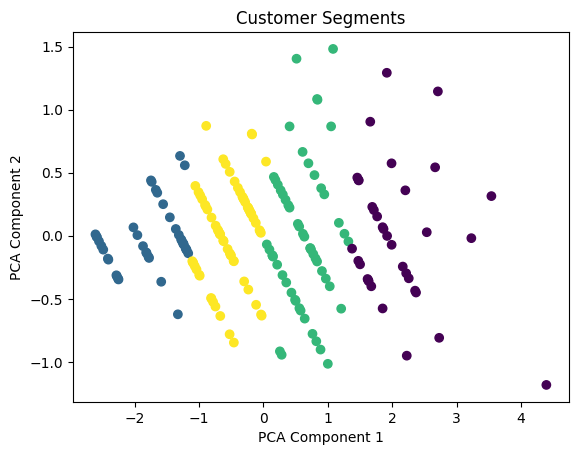

In [25]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_profiles['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [26]:
customer_profiles.to_csv('outputs/FirstName_LastName_Clustering.csv')
